<a href="https://colab.research.google.com/github/afTabassum/EDA-Stats-projects/blob/main/Food_Demand_ML_Compitetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

This week’s challenge focuses on developing a predictive model for food demand forecasting. Accurate forecasting is crucial for food supply chain management, allowing businesses to minimize waste and optimize inventory.

About the Dataset
The dataset consists of historical food demand data from various facilities, regions, and categories. You’ll analyze patterns and trends to predict future demand for food items, helping businesses make informed decisions.

Dataset Description:

Train.csv: Contains historical data with features like food items, demand quantity, and additional contextual information (e.g., promotions types).
Test.csv: The dataset for which you will generate predictions.
Submission.csv: The format for submitting your predictions.

In [ ]:
test = pd.read_csv('/content/Test.csv')
train = pd.read_csv('/content/Train.csv')

In [ ]:
test.head()

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Course,Flavour_Profile
0,101,56,c1,0,1,139.958249,169.692414,0,0,0,Smoothies & Juices,Asian Fusion
1,101,5,c2,977,23595,326.909659,333.530773,0,0,0,Fresh Greens,Mediterranean
2,101,988,c2,17,2,320.866835,328.095148,0,0,0,Smoothies & Juices,Western
3,101,36,c2,0,12,469.922362,476.656331,0,0,0,Smoothies & Juices,Western
4,101,24,c1,0,66,248.252845,326.033774,0,0,0,Grain Bowls,South Asian


In [ ]:
train.head()

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count,Course,Flavour_Profile
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,123,Finger Foods,Asian Fusion
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,55,Broths & Stews,Asian Fusion
2,1,99,c3,0,167,384.988183,388.957411,0,0,0,204,Smoothies & Juices,Western
3,1,95,c3,17,2,255.251864,263.923874,0,0,0,257,Grain Bowls,South Asian
4,1,128,c3,17,18,319.949514,326.128813,0,0,0,14,Appetizers,Asian Fusion


In [ ]:
train.shape , test.shape

((321437, 13), (118070, 12))

In [ ]:
combined = pd.concat([train,test], ignore_index = True)

train.shape, test.shape , combined.shape

((321437, 13), (118070, 12), (439507, 13))

In [ ]:
train.isnull().sum() ,test.isnull().sum() # no null values

In [ ]:
combined.isnull().sum()

,0
Period_No,0
Facility_No,0
Facility_Category,0
City_Zip_Code,0
Operational_Region_Coverage_Area,0
Billing_Amount,0
Labelled_Price,0
Custom_Promoted,0
Promoted,0
Search_Promotions,0


### EDA

1. Univariate
2. Bivariate Analysis
3. Missing values
4. Outlier Identification
5. Feature Engineering
6. **Statistical Hypothesis Testing**
7. Scaling and Transformation

In [ ]:
# find out the numerical variables

combined.select_dtypes(include= np.number).columns

Index(['Period_No', 'Facility_No', 'City_Zip_Code',
       'Operational_Region_Coverage_Area', 'Billing_Amount', 'Labelled_Price',
       'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Orders_Count'],
      dtype='object')

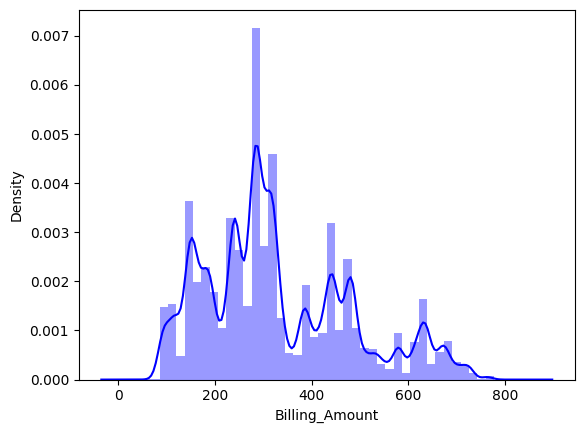

In [ ]:
# Billing Amount

sns.distplot(combined.Billing_Amount, color = 'blue')
plt.show()

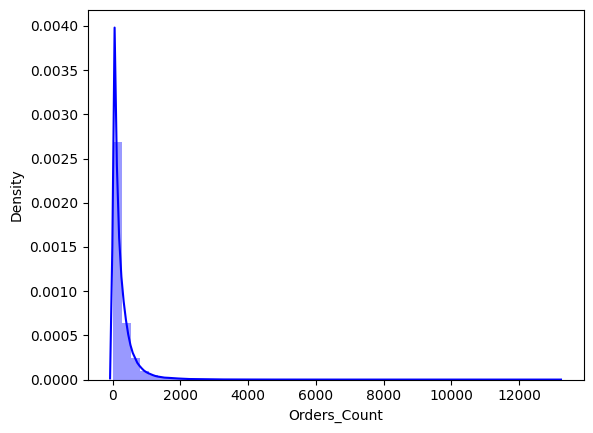

In [ ]:
# Orders Count

sns.distplot(combined.Orders_Count, color = 'blue')
plt.show()

In [ ]:
combined['Orders_Count'].describe()

,Orders_Count
count,321437.000000
mean,261.533790
std,383.785233
min,13.000000
25%,54.000000
50%,136.000000
75%,324.000000
max,13150.000000


In [ ]:
# Top 5 Facilities

combined.Facility_No.value_counts()[:5].index

Index([63, 13, 87, 112, 36], dtype='int64', name='Facility_No')

In [ ]:
top5 = [63, 13, 87, 112, 36]

def facility(x):
  if x in top5:
    return('Top5')
  else:
    return('Orders')

combined['Facility'] = combined['Facility_No'].apply(facility)

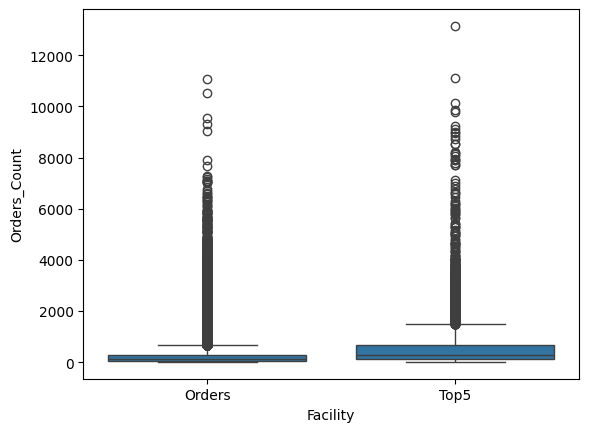

In [ ]:
sns.boxplot(x = 'Facility', y = 'Orders_Count', data= combined)
plt.show()

In [ ]:
combined.Operational_Region_Coverage_Area.value_counts()[:5].index

Index([62, 41, 574, 12, 1], dtype='int64', name='Operational_Region_Coverage_Area')

In [ ]:
top5_op = [62, 41, 574, 12, 1]

def op_region(x):
  if x in top5_op:
    return('Top5')
  else:
    return('Orders')

combined['op_region'] = combined['Operational_Region_Coverage_Area'].apply(op_region)

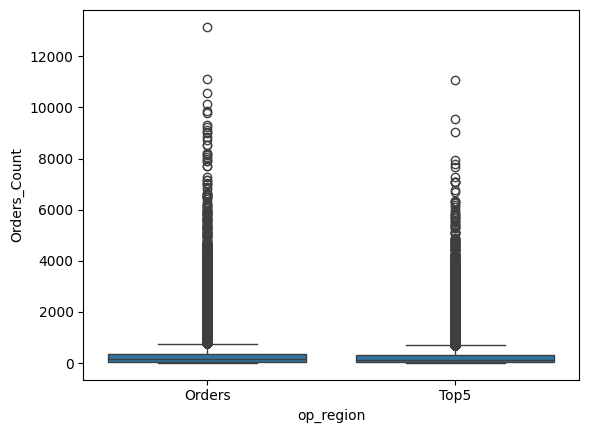

In [ ]:
sns.boxplot(x = 'op_region', y = 'Orders_Count', data= combined)
plt.show()

In [ ]:
# Promotions
combined['Promotions'] = combined['Custom_Promoted']+combined['Promoted'] +combined['Search_Promotions']


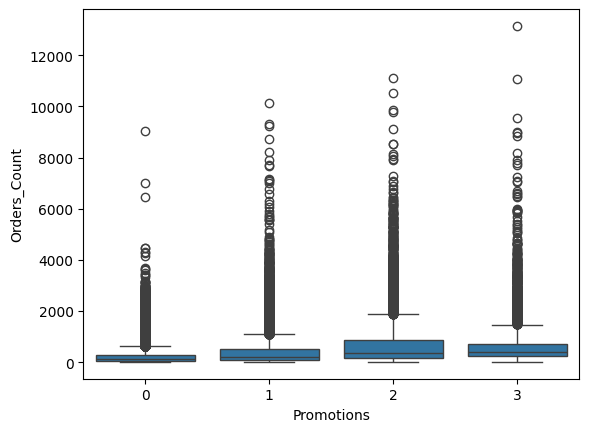

In [ ]:
sns.boxplot(x = 'Promotions', y = 'Orders_Count', data= combined)
plt.show()

In [ ]:
combined.head()

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count,Course,Flavour_Profile,Facility,op_region,Promotions
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,123.0,Finger Foods,Asian Fusion,Orders,Orders,0
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,55.0,Broths & Stews,Asian Fusion,Orders,Top5,0
2,1,99,c3,0,167,384.988183,388.957411,0,0,0,204.0,Smoothies & Juices,Western,Orders,Orders,0
3,1,95,c3,17,2,255.251864,263.923874,0,0,0,257.0,Grain Bowls,South Asian,Orders,Orders,0
4,1,128,c3,17,18,319.949514,326.128813,0,0,0,14.0,Appetizers,Asian Fusion,Orders,Orders,0


In [ ]:
# Course

combined['Course'].unique()

array(['Finger Foods', 'Broths & Stews', 'Smoothies & Juices',
       'Grain Bowls', 'Appetizers', 'Grilled Vegetables',
       'Sweets & Treats', 'Wraps & Rolls', 'Noodles & Veggies',
       'Fresh Greens', 'Condiments & Dips', 'Plant-Based Proteins',
       'Stir-Fried Rice', 'Flatbreads'], dtype=object)

In [ ]:
combined.groupby('Flavour_Profile')['Course'].value_counts()

# Smoothies & Juices	, Wraps & Rolls	, Grain Bowls	, Flatbreads
foods = ['Smoothies & Juices'	, 'Wraps & Rolls'	, 'Grain Bowls'	, 'Flatbreads']

def khana_khazana(x):
  if x in foods:
    return('Top5_Foods')
  else:
    return('Other_Foods')

combined['Course_Cat'] = combined['Course'].apply(khana_khazana)

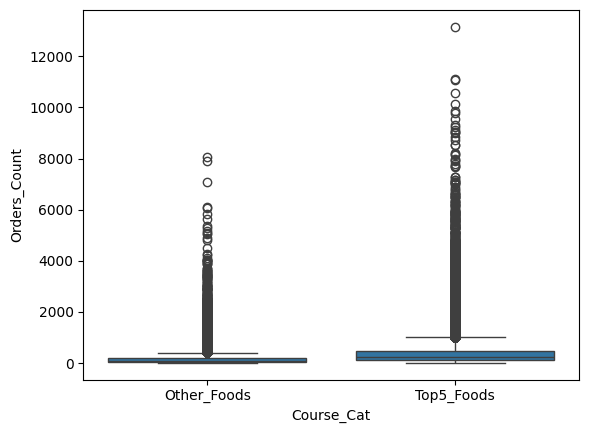

In [ ]:
sns.boxplot(x = 'Course_Cat', y = 'Orders_Count', data= combined)
plt.show()

In [ ]:
# facility Number

combined['Facility_No'].unique()

array([  324,    10,    99,    95,   128,    43,    52,  1476,    55,
          82,    18,    90,   876,   112,   665,     9,    23,  9256,
          78,   856,    67,    32,   426,   101,   132,    53,     7,
           6,    54,    19,    79,   161,    72,    15,    28,   988,
          80,   126,    63,    24,    12,   315,    88,    77,    87,
          66,    36,    13,   108,   111,     4,    40,    42,    17,
           5,   334,    98,   666,   224,   114,    70,    56,     3,
          46,   498,  1836,    57,    45, 12390,   192,   768,    21,
         102,   354,   104,    49,   456])

In [ ]:
combined.groupby('Facility_No')['Orders_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Facility_No,,,,,,,,
3,3847.0,179.099038,196.578163,13.0,42.0,122.0,243.0,2052.0
4,3686.0,196.133749,243.226825,13.0,41.0,123.0,270.0,3523.0
5,4171.0,282.143131,277.867416,13.0,95.0,203.0,378.0,2753.0
6,3677.0,179.811803,207.581795,13.0,41.0,121.0,244.0,2970.0
7,4218.0,195.700806,251.982207,13.0,41.0,107.0,269.0,4227.0
...,...,...,...,...,...,...,...,...
988,4314.0,278.150672,279.311236,13.0,82.0,189.0,379.0,2957.0
1476,4227.0,207.433877,243.021249,13.0,54.0,134.0,284.0,3295.0
1836,4149.0,280.976139,448.862979,13.0,41.0,108.0,379.0,7073.0


In [ ]:
# Facility_No

combined["Magic1"] = combined.groupby("Facility_No")["Orders_Count"].transform("count")
combined["Magic2"] = combined.groupby("Facility_No")["Orders_Count"].transform("min")
combined["Magic3"] = combined.groupby("Facility_No")["Orders_Count"].transform("max")
combined["Magic4"] = combined.groupby("Facility_No")["Orders_Count"].transform("mean")
combined["Magic5"] = combined.groupby("Facility_No")["Orders_Count"].transform("std")
combined["Magic6"] = combined.groupby("Facility_No")["Orders_Count"].transform("median")

In [ ]:
# City_Zip_Code

combined["Magic7"]  = combined.groupby("City_Zip_Code")["Orders_Count"].transform("count")
combined["Magic8"]  = combined.groupby("City_Zip_Code")["Orders_Count"].transform("min")
combined["Magic9"]  = combined.groupby("City_Zip_Code")["Orders_Count"].transform("max")
combined["Magic10"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform("mean")
combined["Magic11"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform("std")
combined["Magic12"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform("median")

In [ ]:
# food category

combined["Magic13"] = combined.groupby("Course")["Orders_Count"].transform("count")
combined["Magic14"] = combined.groupby("Course")["Orders_Count"].transform("min")
combined["Magic15"] = combined.groupby("Course")["Orders_Count"].transform("max")
combined["Magic16"] = combined.groupby("Course")["Orders_Count"].transform("mean")
combined["Magic17"] = combined.groupby("Course")["Orders_Count"].transform("std")
combined["Magic18"] = combined.groupby("Course")["Orders_Count"].transform("median")

In [ ]:
# Operational_Region_Coverage_Area

combined["Magic19"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("count")
combined["Magic20"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("min")
combined["Magic21"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("max")
combined["Magic22"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("mean")
combined["Magic23"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("std")
combined["Magic24"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("median")

In [ ]:
combined['City_Zip_Code'].unique()

array([977,   0,  17, 153, 582, 601, 863, 357])

In [ ]:
combined['Course'].describe()

,Course
count,439507
unique,14
top,Smoothies & Juices
freq,122804


In [ ]:
# check for the missing values

combined.head(2)

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,...,Magic15,Magic16,Magic17,Magic18,Magic19,Magic20,Magic21,Magic22,Magic23,Magic24
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,...,2404.0,164.194783,164.063729,121.0,18103,13.0,10544.0,313.646523,473.337118,148.0
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,...,689.0,88.900551,72.350096,68.0,36987,13.0,9532.0,222.396247,329.431315,122.0


###period number is the time series data
###using sin and cos transformation

In [ ]:
combined.columns

Index(['Period_No', 'Facility_No', 'Facility_Category', 'City_Zip_Code',
       'Operational_Region_Coverage_Area', 'Billing_Amount', 'Labelled_Price',
       'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Orders_Count',
       'Course', 'Flavour_Profile', 'Facility', 'op_region', 'Promotions',
       'Course_Cat', 'Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5',
       'Magic6', 'Magic7', 'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12',
       'Magic13', 'Magic14', 'Magic15', 'Magic16', 'Magic17', 'Magic18',
       'Magic19', 'Magic20', 'Magic21', 'Magic22', 'Magic23', 'Magic24'],
      dtype='object')

In [ ]:
new = combined.drop(['Period_No', 'Facility_No', 'Facility_Category', 'City_Zip_Code',
                     'Operational_Region_Coverage_Area',
                     'Custom_Promoted', 'Promoted', 'Search_Promotions','Course'], axis = 1)

In [ ]:
## Split the Data into Train and Test

newtrain = new.loc[0: train.shape[0]-1, :]
newtest = new.loc[train.shape[0]:, :]

# Anova

In [ ]:
newtest.columns

Index(['Billing_Amount', 'Labelled_Price', 'Orders_Count', 'Flavour_Profile',
       'Facility', 'op_region', 'Promotions', 'Course_Cat', 'Magic1', 'Magic2',
       'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7', 'Magic8', 'Magic9',
       'Magic10', 'Magic11', 'Magic12', 'Magic13', 'Magic14', 'Magic15',
       'Magic16', 'Magic17', 'Magic18', 'Magic19', 'Magic20', 'Magic21',
       'Magic22', 'Magic23', 'Magic24'],
      dtype='object')

In [ ]:
newtrain.columns

Index(['Billing_Amount', 'Labelled_Price', 'Orders_Count', 'Flavour_Profile',
       'Facility', 'op_region', 'Promotions', 'Course_Cat', 'Magic1', 'Magic2',
       'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7', 'Magic8', 'Magic9',
       'Magic10', 'Magic11', 'Magic12', 'Magic13', 'Magic14', 'Magic15',
       'Magic16', 'Magic17', 'Magic18', 'Magic19', 'Magic20', 'Magic21',
       'Magic22', 'Magic23', 'Magic24'],
      dtype='object')

In [ ]:
nums = ['Billing_Amount', 'Labelled_Price','Magic1', 'Magic2',
       'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7', 'Magic8', 'Magic9',
       'Magic10', 'Magic11', 'Magic12', 'Magic13', 'Magic14', 'Magic15',
       'Magic16', 'Magic17', 'Magic18', 'Magic19', 'Magic20', 'Magic21',
       'Magic22', 'Magic23', 'Magic24']

import scipy.stats as stats
pvals = []

for i in nums:
  tstat, pval = stats.ttest_ind(newtrain.loc[:,i],
                                newtrain.Orders_Count)
  pvals.append(pval)

In [ ]:
pd.DataFrame(pvals, index = nums, columns = ['Pvalue'])

,Pvalue
Billing_Amount,0.000000e+00
Labelled_Price,0.000000e+00
Magic1,0.000000e+00
Magic2,0.000000e+00
Magic3,0.000000e+00
Magic4,1.000000e+00
Magic5,0.000000e+00
Magic6,0.000000e+00
Magic7,0.000000e+00
Magic8,0.000000e+00


In [ ]:
# ANOVA

newtrain.columns

Index(['Billing_Amount', 'Labelled_Price', 'Orders_Count', 'Flavour_Profile',
       'Facility', 'op_region', 'Promotions', 'Course_Cat', 'Magic1', 'Magic2',
       'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7', 'Magic8', 'Magic9',
       'Magic10', 'Magic11', 'Magic12', 'Magic13', 'Magic14', 'Magic15',
       'Magic16', 'Magic17', 'Magic18', 'Magic19', 'Magic20', 'Magic21',
       'Magic22', 'Magic23', 'Magic24'],
      dtype='object')

In [ ]:
cats = ['Facility', 'op_region', 'Promotions', 'Course_Cat']

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

model = sfa.ols('Orders_Count~Facility+op_region+Promotions+Course_Cat',
                data = newtrain).fit()

anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Facility,1.0,1.605818e+09,1.605818e+09,13852.301936,0.00000
op_region,1.0,9.465816e+05,9.465816e+05,8.165518,0.00427
Course_Cat,1.0,4.440800e+09,4.440800e+09,38307.770964,0.00000
Promotions,1.0,4.035336e+09,4.035336e+09,34810.113018,0.00000
Residual,321432.0,3.726176e+10,1.159242e+05,NaN,NaN
